#Part 2: Deep Convolutional AutoEncoder

In [ ]:
#Reshape data into 2-D signals and account for grayscale channel in each image
data_train = data_train.reshape(-1,28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)

In [ ]:
import tensorflow as tf

#Model Setting
batch_size = 100

#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(1, kernel_size=3, activation='sigmoid', padding='same'))
    return model

#Create deep autoencoder graph
conv_ae_mse = cae()
conv_ae_bce = cae()

#Compile model using an appropriate loss and optimizer algorithm
conv_ae_mse.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
conv_ae_bce.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

#Train the model and assign training meta-data to a variable
conv_ae_mse_metadata = conv_ae_mse.fit(data_train, data_train,
                                       validation_data=(data_test, data_test),
                                       epochs=150,
                                       batch_size=batch_size,
                                       shuffle=True)
conv_ae_bce_metadata = conv_ae_bce.fit(data_train, data_train,
                                       validation_data=(data_test, data_test),
                                       epochs=150,
                                       batch_size=batch_size,
                                       shuffle=True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_mse = conv_ae_mse.predict(data_test)
reconstructions_bce = conv_ae_bce.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([conv_ae_mse.layers[0].input], [conv_ae_mse.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([data_test])[0]

Epoch 1/150
600/600 [==============================] - 3s 5ms/step - loss: 0.1032 - val_loss: 0.0314
Epoch 2/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0236 - val_loss: 0.0179
Epoch 3/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0157 - val_loss: 0.0135
Epoch 4/150
600/600 [==============================] - 3s 4ms/step - loss: 0.0126 - val_loss: 0.0112
Epoch 5/150
600/600 [==============================] - 3s 4ms/step - loss: 0.0109 - val_loss: 0.0099
Epoch 6/150
600/600 [==============================] - 3s 4ms/step - loss: 0.0097 - val_loss: 0.0090
Epoch 7/150
600/600 [==============================] - 3s 4ms/step - loss: 0.0089 - val_loss: 0.0083
Epoch 8/150
600/600 [==============================] - 3s 4ms/step - loss: 0.0083 - val_loss: 0.0078
Epoch 9/150
600/600 [==============================] - 3s 4ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 10/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0074 - val_lo

In [ ]:
#Obtain encoder representation of data
get_hl = K.function([conv_ae_mse.layers[0].input], [conv_ae_mse.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([data_test])[0]

Text(0.5, 1.0, 'Binary Crossentropy Loss vs Epoch')

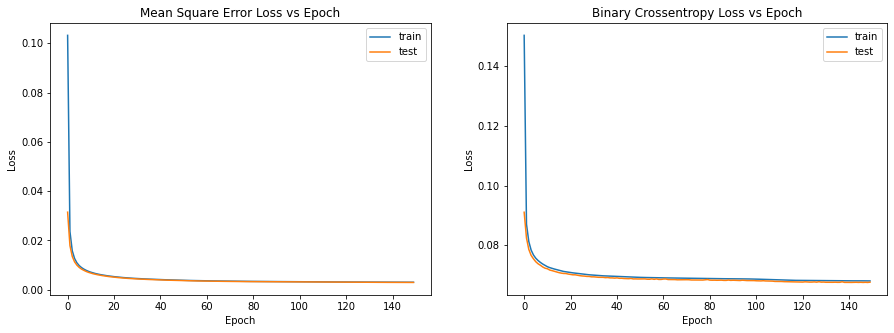

In [ ]:
import matplotlib.pyplot as plt

#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(conv_ae_mse_metadata.history['loss'])
axes[0].plot(conv_ae_mse_metadata.history['val_loss'])
axes[1].plot(conv_ae_bce_metadata.history['loss'])
axes[1].plot(conv_ae_bce_metadata.history['val_loss'])
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[0].legend(['train', 'test'], loc='upper right')
axes[1].legend(['train', 'test'], loc='upper right')
axes[0].set_title('Mean Square Error Loss vs Epoch')
axes[1].set_title('Binary Crossentropy Loss vs Epoch')

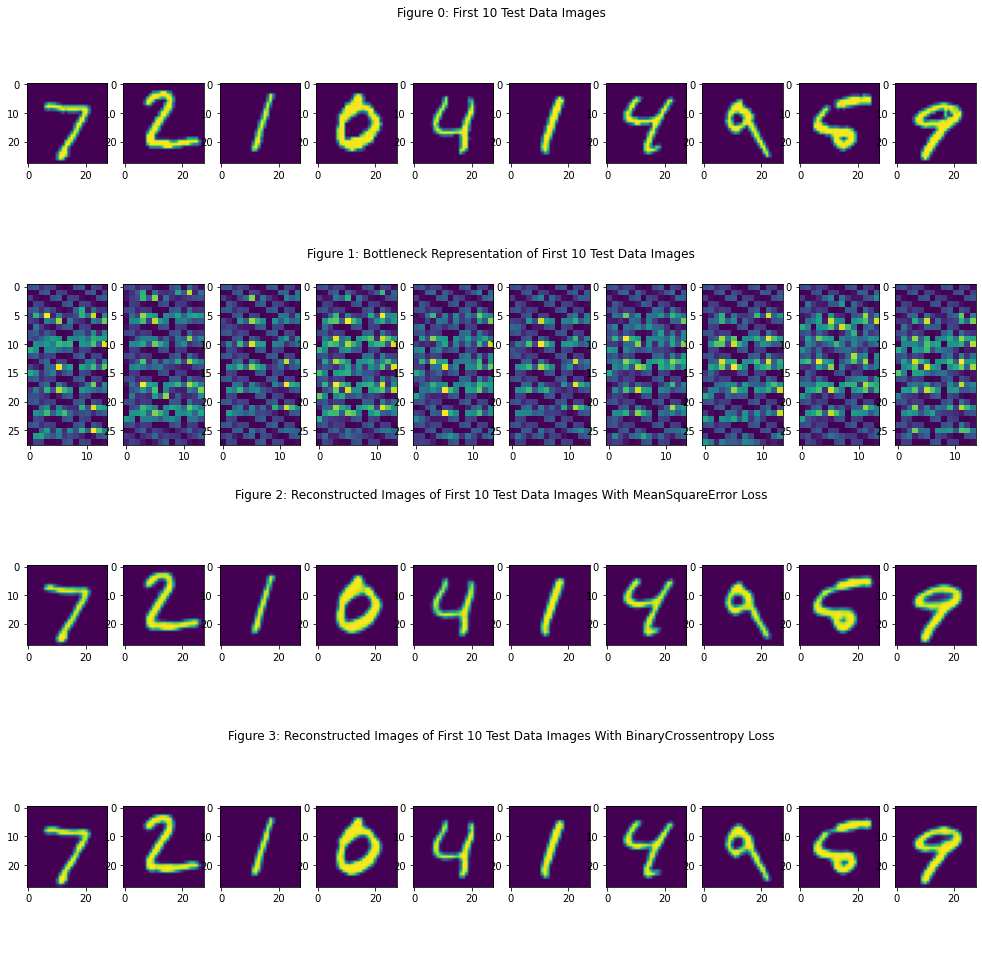

In [ ]:
# Show samples of 10 images, their hidden layer representations, and their reconstructions
fig, ax = plt.subplots(4, 10, figsize = (17, 17))
grid = plt.GridSpec(4, 1)

subtitles = ['First 10 Test Data Images',
             'Bottleneck Representation of First 10 Test Data Images',
             'Reconstructed Images of First 10 Test Data Images With MeanSquareError Loss',
             'Reconstructed Images of First 10 Test Data Images With BinaryCrossentropy Loss']
for i in range(4):
  row = fig.add_subplot(grid[i])
  row.set_title(f'Figure {i}: ' + subtitles[i])
  row.set_axis_off()

for i in range(10):
  ax[0][i].imshow(data_test[i].reshape(28, 28))
  ax[1][i].imshow(conv_ae_hl[i].reshape(28, 14))
  ax[2][i].imshow(reconstructions_mse[i].reshape(28, 28))
  ax[3][i].imshow(reconstructions_bce[i].reshape(28, 28))

Answer the following questions: 


1.  Question 4: Which loss function is better and why?

ANSWER: Binary Cross Entropy is a better loss function in this scenario as the output of the last layer is sigmoid (exponential). The mean square loss error instead faces issues of gradient quickly approaching zero and causes the risk of training to stall.